In [4]:
# Install the required packages
# Import matplotlib, pandas, scikit-learn, numpy, and seaborn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [61]:
#read file C:\Users\casa\OneDrive\Área de Trabalho\Case_superstore_dataset\Sample - Superstore.csv as df
df = pd.read_csv('C:/Users/casa/OneDrive/Área de Trabalho/Case_superstore_dataset/Sample - Superstore.csv', encoding='ISO-8859-1')

In [62]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
## Data cleaning and Preprocessing

In [63]:
#columns type
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [9]:
#Add a binary column for 1 if Discount is greater than 0 and 0 otherwise
df['Discount_bin'] = np.where(df['Discount'] > 0, 1, 0)

#Count and print missing values
print(df.isnull().sum())

#show unique values of the columns
df.nunique()

#Place two decimal places in the Profit column
df['Profit'] = df['Profit'].round(2)



Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Discount_bin     0
dtype: int64


In [65]:
#Drop Customer ID, product name, and postal code
df = df.drop(columns=['Customer ID', 'Product Name', 'Postal Code','Row ID'])

In [66]:
#Print unique values of the columns Category : 'Category', Sub-category : 'Sub-Category', Region : 'Region', Segment : 'Segment', Ship Mode : 'Ship Mode', State : 'State', City : 'City' 
# + '\n' for each print
print('Category :', df['Category'].unique(), '\n')
print('Sub-Category :', df['Sub-Category'].unique(), '\n')
print('Region :', df['Region'].unique(), '\n')
print('Segment :', df['Segment'].unique(), '\n')
print('Ship Mode :', df['Ship Mode'].unique(), '\n')
print('State :', df['State'].unique(), '\n')
print('City :', df['City'].unique(), '\n')

Category : ['Furniture' 'Office Supplies' 'Technology'] 

Sub-Category : ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers'] 

Region : ['South' 'West' 'Central' 'East'] 

Segment : ['Consumer' 'Corporate' 'Home Office'] 

Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day'] 

State : ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyom

In [68]:
#Describe the data and round to 2 decimal places
df.describe().round(2)

##High STD for Sales and Profit

,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00
mean,229.86,3.79,0.16,28.66
std,623.25,2.23,0.21,234.26
min,0.44,1.00,0.00,-6599.98
25%,17.28,2.00,0.00,1.73
50%,54.49,3.00,0.20,8.67
75%,209.94,5.00,0.20,29.36
max,22638.48,14.00,0.80,8399.98


In [52]:
valor = df['Discount'].value_counts().sort_index(ascending=True)
valor



Discount
0.00    4798
0.10      94
0.15      52
0.20    3657
0.30     227
0.32      27
0.40     206
0.45      11
0.50      66
0.60     138
0.70     418
0.80     300
Name: count, dtype: int64

In [60]:
#Show each discount for all quantity and the number of times it appears. Column labels are 'Discount' and 'Quantity'
df.groupby('Discount').agg({'Quantity': 'sum'}).reset_index()


,Discount,Quantity
0,0.00,18267
1,0.10,373
2,0.15,198
3,0.20,13660
4,0.30,849
5,0.32,105
6,0.40,786
7,0.45,45
8,0.50,241
9,0.60,501


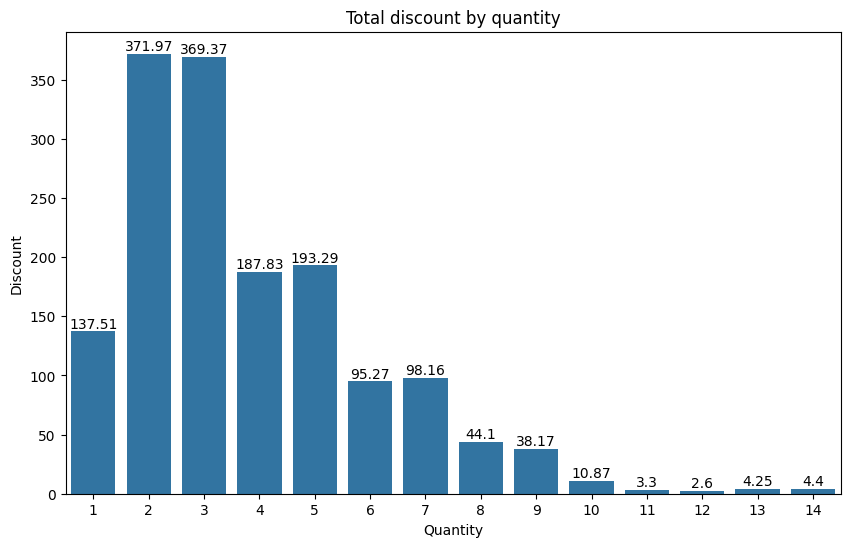

In [71]:
#Groupby quantity by discounts and reset the index
total_discount = df.groupby('Quantity').sum().reset_index()


#Create a barplot that displays all labels values where x = Quantity and y = Discount
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Quantity', y='Discount', data=total_discount)
ax.bar_label(ax.containers[0])
plt.title('Total discount by quantity')
plt.show()

In [ ]:
# Table that aggregates the sum sales and profit by quantity
df.groupby('Quantity').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()


Quantity,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Discount,,,,,,,,,,,,,,
0.00,25204.3200,122076.5000,195677.3700,153716.9200,221025.9000,67643.1600,132764.8000,54731.680,67587.6600,7970.400,7485.940,4769.400,20090.200,7164.220
0.10,931.5630,10637.6580,5555.4930,3115.6920,8383.5000,7838.8020,2594.8440,2563.056,4595.6160,1448.820,5509.449,NaN,NaN,1194.858
0.15,768.3320,5199.7730,4005.8970,1505.9960,5634.9050,1203.3960,1897.8120,3889.328,917.9235,1198.330,NaN,NaN,1336.829,NaN
0.20,19112.5280,108064.0960,158604.4800,110064.8320,118358.4400,79061.1360,66767.7920,36087.680,36660.6000,10789.120,2708.552,7961.760,6433.128,3920.224
0.30,2274.7130,15360.1840,21601.4190,11687.1160,23143.0500,8876.1540,7624.3020,3263.064,8902.0890,239.960,NaN,NaN,NaN,254.604
0.32,361.7260,1314.9568,2459.9952,3193.0624,1264.6640,1227.9984,2536.7944,NaN,1352.3976,781.864,NaN,NaN,NaN,NaN
0.40,2442.2520,15152.1720,19721.3760,20515.7280,12045.6600,5067.5040,14344.7640,13321.008,5830.2720,996.240,NaN,2137.248,4297.644,545.916
0.45,191.5155,233.8600,1170.1305,1316.7000,957.5775,721.8750,893.3155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.50,1046.8650,4284.6300,7404.2550,10254.6400,5078.0750,25467.7200,4995.4450,NaN,386.9100,NaN,NaN,NaN,NaN,NaN


In [27]:
#sum all rows for Quantity = 1
df[df['Quantity'] == 2].sum()



Order ID         CA-2016-152156CA-2016-138688US-2015-108966CA-2...
Order Date       11/8/20166/12/201610/11/20155/13/20148/27/2014...
Ship Date        11/11/20166/16/201610/18/20155/15/20149/1/2014...
Ship Mode        Second ClassSecond ClassStandard ClassSecond C...
Customer Name    Claire GuteDarrin Van HuffSean O'DonnellAlejan...
Segment          ConsumerCorporateConsumerConsumerConsumerConsu...
Country          United StatesUnited StatesUnited StatesUnited ...
City             HendersonLos AngelesFort LauderdaleWest Jordan...
State            KentuckyCaliforniaFloridaUtahCaliforniaPennsyl...
Region           SouthWestSouthWestWestEastWestEastEastEastWest...
Product ID       FUR-BO-10001798OFF-LA-10000240OFF-ST-10000760O...
Category         FurnitureOffice SuppliesOffice SuppliesOffice ...
Sub-Category     BookcasesLabelsStorageStorageArtChairsBindersB...
Sales                                                  289091.4798
Quantity                                                      

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = [10, 9, 2]
 
# Choose the height of the cyan bars
bars2 = [10.8, 9.5, 4.5]
 
# Choose the height of the error bars (bars1)
yer1 = [0.5, 0.4, 0.5]
 
# Choose the height of the error bars (bars2)
yer2 = [1, 0.7, 1]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='poacee')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='sorgho')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['cond_A', 'cond_B', 'cond_C'])
plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()

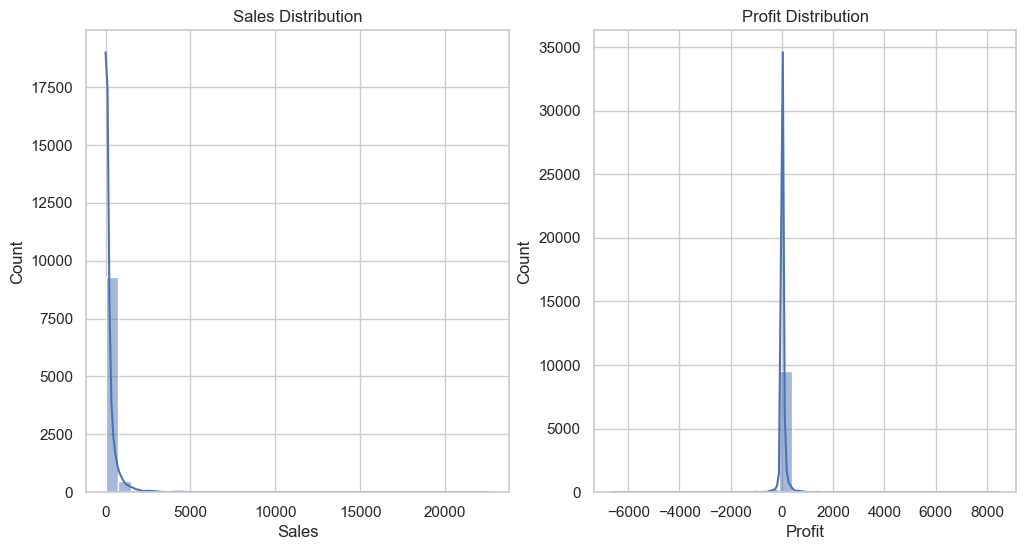

In [31]:
#Histogram of Sales and Profit
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title('Profit Distribution')
plt.show()


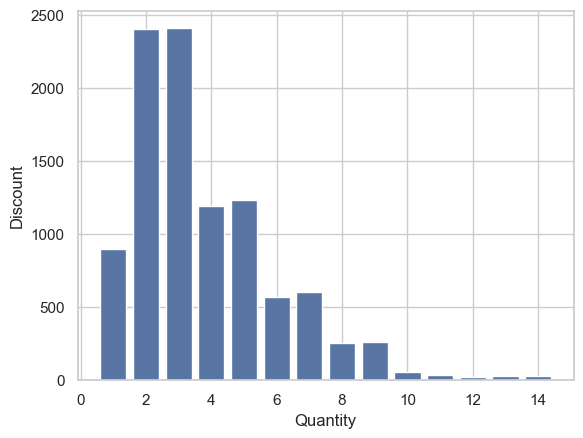

In [50]:

#Bar plot and add a line for the mean
ax = sns.barplot(
    df, x="Quantity", y="Discount",
    native_scale=True,
    estimator="count", errorbar=None,
)



In [ ]:
#Relacionar lucro em relação a quantidade vendida e o desconto atrelado

In [ ]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
sns.barplot(flights_wide)

In [15]:
#Shipping analysis


In [16]:
#Region analysis

<Axes: xlabel='Region', ylabel='Profit'>

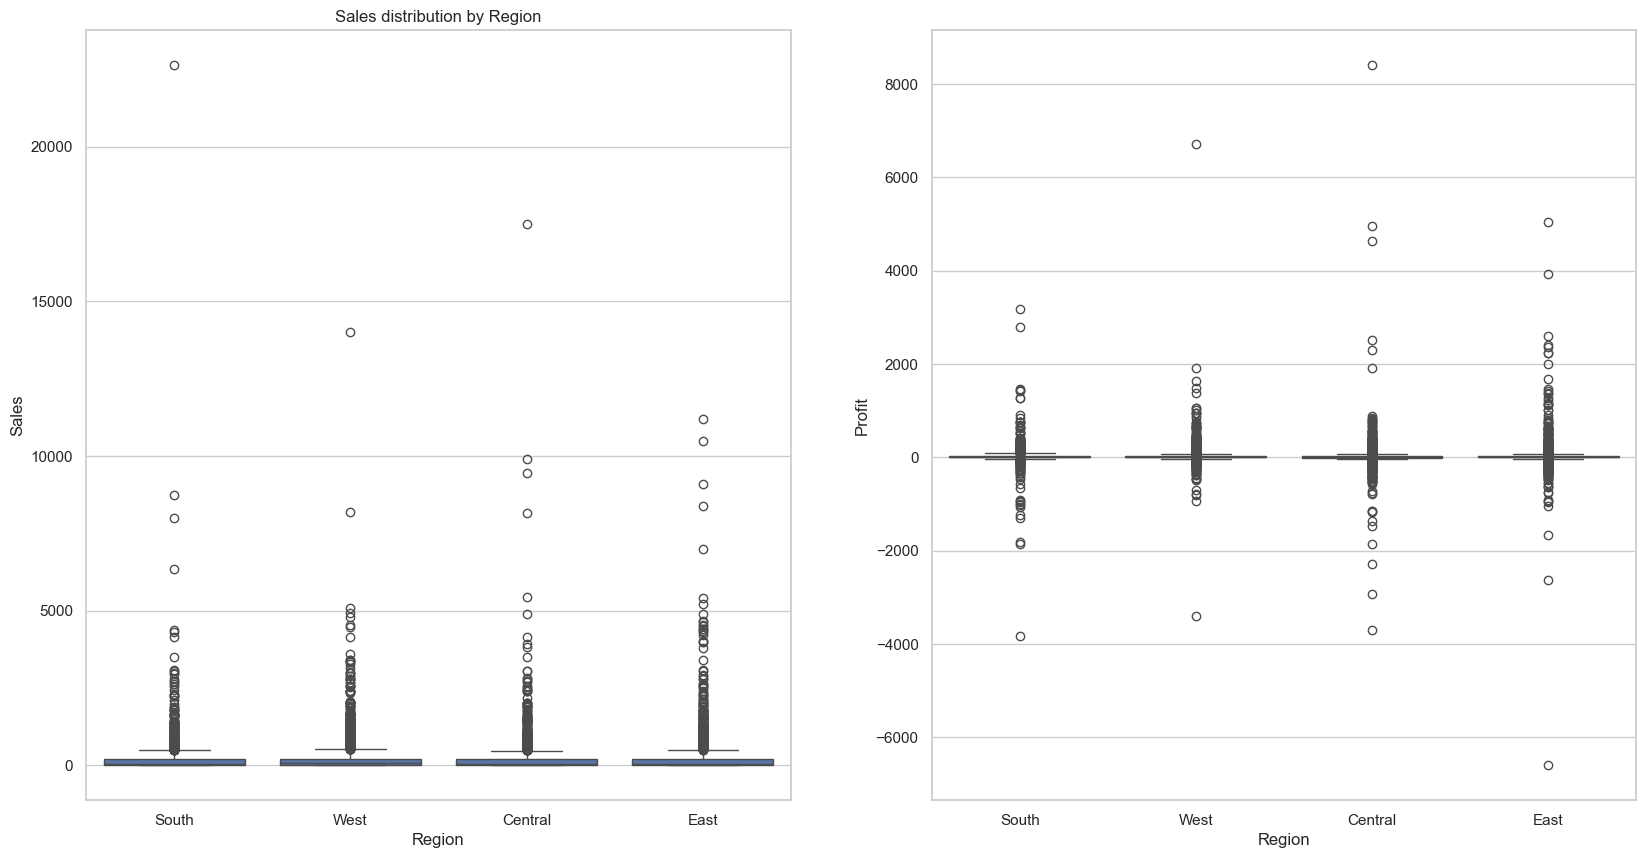

In [21]:
#Plot distribution for sales and profit
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Region', y='Sales', data=df)
plt.title('Sales distribution by Region')
plt.subplot(1, 2, 2)
sns.boxplot(x='Region', y='Profit', data=df)


In [18]:
#Aggregate view of the data
